In [1]:
from openai import OpenAI
import os

client = OpenAI(
    # defaults to os.environ.get("OPENAI_API_KEY")
    api_key=os.getenv("OPENAI_API_KEY"),
    base_url="https://api.chatanywhere.tech/v1"
    # base_url="https://api.chatanywhere.org/v1"
)

In [3]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "user", "content": f"请将以下文本转换为步骤：\n{text}"}
    ],
    max_tokens=150,
    temperature=0
)

In [23]:
text = """操作1：检查装置气密性
    用火柴1点燃酒精灯，观察导管口是否会有连续、均匀气泡冒出 。

    操作2：熄灭酒精灯进行正式制取实验过程
    将酒精灯帽盖在酒精灯上。

    操作3：取药品
    打开装有高猛酸钾的塞，用药匙取高猛酸钾

    操作4：装药品
    将高锰酸钾药品平铺在试管底部，管口放一小团棉花，用带导管的单孔橡皮塞塞紧试管口。并固定在铁架台上

    操作5：点燃酒精灯加热
    用火柴2点燃酒精灯

    操作6：观察到有均匀气体冒出，收集气体
    操作7：实验结束
"""

In [43]:
# 使用 GPT API 分析文本，提取步骤  
def get_gpt_parsed_steps(messages,text):  
    try:  
        # 确保此行使用的是 OpenAI 的官方 API  
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=messages+ [  
                {  
                    "role": "user",  
                    "content": "请将以下文本转换为步骤，并解释每个步骤的思路链：\n" + text  
                }  
            ],
            max_tokens=1000,
            temperature=0
        )
        # 正确访问响应内容  
        steps = response.choices[0].message.content
        return steps  
    except Exception as e:  
        print(f"Error during API call: {e}")  
        return []  

操作1：检查装置气密性
    用火柴1点燃酒精灯，观察导管口是否会有连续、均匀气泡冒出 。

    操作2：熄灭酒精灯进行正式制取实验过程
    将酒精灯帽盖在酒精灯上。

    操作3：取药品
    打开装有高猛酸钾的塞，用药匙取高猛酸钾

    操作4：装药品
    将高锰酸钾药品平铺在试管底部，管口放一小团棉花，用带导管的单孔橡皮塞塞紧试管口。并固定在铁架台上

    操作5：点燃酒精灯加热
    用火柴2点燃酒精灯

    操作6：观察到有均匀气体冒出，收集气体
    操作7：实验结束

流程图已生成并保存为 flowchart_1732341968.png


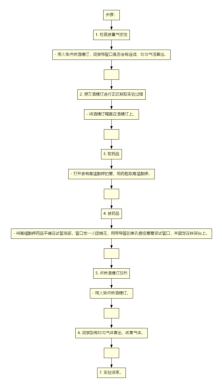

In [26]:
from graphviz import Digraph  
import time  
from PIL import Image  
import matplotlib.pyplot as plt  

def convert_to_graphviz_format(parsed_steps):  
    dot = Digraph()  
    dot.attr(fontname="Microsoft YaHei")  # 设置图的全局字体  

    for i, step in enumerate(parsed_steps):  
        dot.node(f'step{i}', step.strip(), shape='box', style='filled', fillcolor='lightyellow', fontname='Microsoft YaHei')  
        if i > 0:  # 如果不是第一步，连接到前一步  
            dot.edge(f'step{i-1}', f'step{i}', fontname='Microsoft YaHei')  
    return dot

def create_flowchart(dot):  
    filename = f'flowchart_{int(time.time())}'  
    dot.render(filename, format='png', cleanup=True)  
    print(f"流程图已生成并保存为 {filename}.png")  
    display_flowchart(filename+".png")  # 显示生成的图片  

def display_flowchart(filename):  
    img = Image.open(filename)  
    plt.imshow(img)  
    plt.axis('off')  # 不显示坐标轴  
    plt.show()  

def text_2_flowchart(text):  
    parsed_steps = get_gpt_parsed_steps(text)  
    graphviz_format = convert_to_graphviz_format(parsed_steps)  
    create_flowchart(graphviz_format)  

# 调用主函数，传入要转换的文本  
# text = "在超市购物的步骤包括：1. 制定购物清单，2. 选择购物车，3. 在各个货架上挑选商品，4. 结账，5. 离开商店。"  
print(text)
text_2_flowchart(text)

In [ ]:
import re
def preprocess_input(user_input):  
    # 移除无关内容，保留主要提问  
    cleaned_input = re.sub(r"I want to create a|create a", "", user_input, flags=re.IGNORECASE).strip()  
    return cleaned_input  

In [ ]:
def format_flowchart_steps(steps):  
    formatted_steps = []  
    for step in steps:  
        # 移除任何多余的信息，只保留核心内容  
        clean_step = re.sub(r"Step \d+:\s*", "", step).strip()  # 移除"Step n:"模式  
        if clean_step:  
            formatted_steps.append(clean_step)  
    return formatted_steps  